# Introdução a machine learning  classificação IV
___

#### Importando bibliotecas

In [51]:
import pandas as pd
import numpy as np
from datetime import datetime

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.tree import export_graphviz
import graphviz

#### Importando Dados

In [52]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'

data = pd.read_csv(uri)
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


#### Traduzindo as variáveis

In [53]:
traducao = {
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido',
}

data = data.rename(columns=traducao)
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


#### Alterando os valores: [yes - 1,  no - 0]

In [54]:
trocar = {
    'yes' : 1,
    'no': 0
}

data.vendido = data.vendido.map(trocar)
data.tail()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
9995,9995,15572,2006,97112.86,0
9996,9996,13246,2002,107424.63,1
9997,9997,13018,2014,93856.99,0
9998,9998,10464,2011,51250.57,1
9999,9999,12362,1999,87945.73,0


#### Criando uma nova coluna com a idade do modelo do veículo, utilizando o ano atual

In [55]:
ano_atual = datetime.today().year
data['idade_do_modelo'] = ano_atual - data.ano_do_modelo
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


#### Transformando os milhas em km

In [56]:
data['Km_por_ano'] = data.milhas_por_ano * 1.60934
data.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,Km_por_ano
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


#### Retirando as colunas que não serão utilizadas

In [57]:
data = data.drop(columns=['Unnamed: 0', 'milhas_por_ano', 'ano_do_modelo'], axis=1)
data.head()

,preco,vendido,idade_do_modelo,Km_por_ano
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


#### Separando os dados para classificação

In [58]:
x = data[['preco', 'idade_do_modelo', 'Km_por_ano']]
y = data['vendido']

In [59]:
SEED = 5
np.random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print(f'treinaremos com {len(treino_x)} e testaremos com {len(teste_x)} elementos')

modelo = LinearSVC(max_iter=1000)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia foi: {(acuracia * 100).round(2)}%')

treinaremos com 7500 e testaremos com 2500 elementos
A acurácia foi: 46.88%


c:\Users\Ewerton\anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


#### SKLearn Dummy

In [60]:
dummy_stratified = DummyClassifier(strategy='stratified')
dummy_stratified.fit(treino_x, treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y)
print(f'A acurácia do dummy stratified foi: {(acuracia * 100).round(2)}%')

A acurácia do dummy stratified foi: 52.44%


In [61]:
dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x, treino_y)
acuracia = dummy_most_frequent.score(teste_x, teste_y)
print(f'A acurácia do dummy stratified foi: {(acuracia * 100).round(2)}%')

A acurácia do dummy stratified foi: 58.0%


#### StandardScaler

In [62]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia do algorítmo de baseline foi: {(acuracia * 100).round(2)}%')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do algorítmo de baseline foi: 76.44%


#### Utilizando uma árvore de decisões

In [63]:
raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(raw_treino_x, treino_y)
previsoes = modelo.predict(raw_teste_x)

acuracia = accuracy_score(teste_y, previsoes)
print(f'A acurácia do algorítmo de baseline foi: {(acuracia * 100).round(2)}%')

Treinaremos com 7500 elementos e testaremos com 2500 elementos
A acurácia do algorítmo de baseline foi: 79.6%


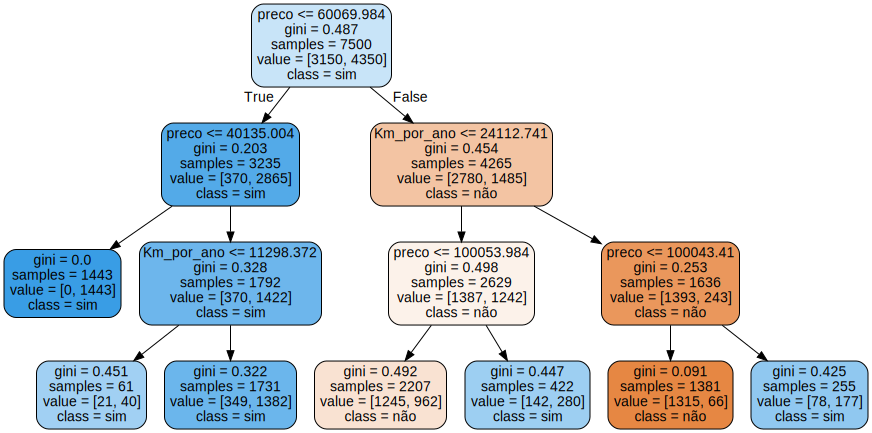

In [64]:
features = x.columns
dot_data = export_graphviz(modelo, 
                           out_file=None,
                           filled=True,
                           rounded=True,
                           feature_names=features,
                           class_names=['não', 'sim'])
grafico = graphviz.Source(dot_data)
grafico